In [ ]:
### ABSTRACT 
With the development of technology,need for more resources and searching for life humans start looking for space at the early times this searching mostly done by using telescopes such as Kepler, Hubble,TESS etc.Looking for planets outside our solar system which called exoplanets and finding them using these telescopes and then trying to find similar features as earth to understand is there a life out there for us.They have find some exoplanets and they also find out some of them are suitable for humans to live.But the main problem about searching for exoplanets and habitability with telescopes is that the telescopes have limited reachs and finding with them is very slow process.  More lately with the development of machine learning in astronomy with the correct models(with using already founded exoplanets with Radial Velocity or Transit methods.) it seen that we can estimate is planet habitable or not much faster.Then instead of looking with telescopes first making an estimation with ml model and then confirming with a telescope is a better way to find exoplanets and habitability in them.
In this project i will use various ml models and look for the best fitted model for this job and i will search an answer for is every exoplanet that has earth like features habitable.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
import scipy.stats as stats
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
import xgboost as xgb
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
exoplanets=pd.read_csv("exoplanets.csv")

#exoplanets.info()  #column information

In [3]:
pd.set_option("display.max_columns", None)
exoplanets.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec;;;;;;
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03000,0.32,-0.32,0.0,1.29,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.6000,476.7000,-476.7000,0.0,19.40,1.50,-1.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.6000,476.7000,-476.7000,0.0,19.40,1.50,-1.50,0.0,Msini,NaN,NaN,NaN,NaN,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### DATA
While we can find the explantaion of the data in: https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html <br>
I will give some of the important and used columns explantaion in here <br>
- pl_name:Planets Name
- sy_pnum: Number of planets in the system.
- pl_orber: Passed time that a planet complete one orbit around star.(Orbital Period)
- pl_rade:Radius of the planet relative to earth
- pl_masse:Mass of the planet relative to earth
- pl_insol:Flux of the planet(Another way to find temperature) relative to earth 
- pl_eqt:Equilibrium temperature of the planet in kelvin
- st_teff:Stellar temperature
- st_rad:Radius of the stellar
- st_mass:Mass of the stellar
- st_met:Metal content of the planet in photosphere
- sy_pm:Total motion change in position seen from the center of mass of the solar system
- sy_pmra:Proper motion 
- sy_plx=Parallax(Difference in the angular position of a star as measured at two opposite positions within the Earth's orbit)
- sy_jmag=Brigntess of star in J unit of magnitude
- sy_hmag=Brightness of star in H unit of magnitude
- sy_vmag=Brightness of star in V unit of magnitude
- sy_kmag=Brightness  of star in K unit of magnitude
- Habitable_Planets:Indication for the planet is habitable or not i will add this from another dataset
- P_ESI:planet earth similarity index
- P_ECCENTRICITY:A perfectly circular orbit has an eccentricity of zero; higher numbers indicate more elliptical orbits

In [4]:
#Before analyzing the data we are checking for null values
exoplanets.isnull().sum()

pl_name                  0
hostname                 0
pl_letter                0
hd_name               3639
hip_name              3552
                      ... 
st_nphot                 0
st_nrvc                  0
st_nspec                 0
pl_nespec                0
pl_ntranspec;;;;;;       0
Length: 286, dtype: int64

Since this is a research about exoplanets there are many unkown or uncofirmed data in the dataset about the planets features.So before going to analayze we are going to remove some of the columns that has a lot of null values and has no use for this job

In [5]:
#Sorting by the value to see the columns with most null
sorted(exoplanets.isnull().sum().items(),reverse=True,key=lambda k:k[1])

[('sy_kepmagerr1', 4389),
 ('sy_kepmagerr2', 4389),
 ('pl_trueobliqerr1', 4382),
 ('pl_trueobliqerr2', 4382),
 ('pl_trueobliq', 4381),
 ('pl_trueobliqlim', 4381),
 ('pl_occdep', 4374),
 ('pl_occdeperr1', 4374),
 ('pl_occdeperr2', 4374),
 ('pl_occdeplim', 4374),
 ('sy_icmagerr1', 4373),
 ('sy_icmagerr2', 4373),
 ('sy_icmag', 4372),
 ('pl_projobliqerr1', 4352),
 ('pl_projobliqerr2', 4352),
 ('pl_projobliq', 4350),
 ('pl_projobliqlim', 4350),
 ('pl_cmasse', 4342),
 ('pl_cmasseerr1', 4342),
 ('pl_cmasseerr2', 4342),
 ('pl_cmasselim', 4342),
 ('pl_cmassj', 4342),
 ('pl_cmassjerr1', 4342),
 ('pl_cmassjerr2', 4342),
 ('pl_cmassjlim', 4342),
 ('st_rotperr1', 4195),
 ('st_rotperr2', 4195),
 ('st_rotp', 4122),
 ('st_rotplim', 4122),
 ('pl_insolerr1', 4082),
 ('pl_insolerr2', 4082),
 ('pl_insol', 4063),
 ('pl_insollim', 4063),
 ('pl_trandeperr1', 4000),
 ('pl_trandeperr2', 4000),
 ('pl_trandep', 3954),
 ('pl_trandeplim', 3953),
 ('sy_umag', 3887),
 ('sy_umagerr1', 3887),
 ('sy_umagerr2', 3887),
 

Now loading the other dataset which contains habitability of the planets as a column

In [6]:
habitability_exoplanets=pd.read_csv("phl_exoplanet_catalog.csv")
#habitability_exoplanets.info() #information about dataset

In [7]:
habitability_exoplanets.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,P_TPERI,P_TPERI_ERROR_MIN,P_TPERI_ERROR_MAX,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,P_TEMP_MEASURED,P_GEO_ALBEDO,P_GEO_ALBEDO_ERROR_MIN,P_GEO_ALBEDO_ERROR_MAX,P_DETECTION,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ALT_NAMES,P_ATMOSPHERE,S_NAME,S_RA,S_DEC,S_MAG,S_DISTANCE,S_DISTANCE_ERROR_MIN,S_DISTANCE_ERROR_MAX,S_METALLICITY,S_METALLICITY_ERROR_MIN,S_METALLICITY_ERROR_MAX,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_RADIUS_ERROR_MIN,S_RADIUS_ERROR_MAX,S_TYPE,S_AGE,S_AGE_ERROR_MIN,S_AGE_ERROR_MAX,S_TEMPERATURE,S_TEMPERATURE_ERROR_MIN,S_TEMPERATURE_ERROR_MAX,S_DISC,S_MAGNETIC_FIELD,S_LOG_G,S_ALT_NAMES,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TYPE,S_RADIUS_EST,S_TYPE_TEMP,S_RA_H,S_RA_T,S_DEC_T,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,1.29,-0.05,0.05,0.231,-0.005,0.005,NaN,NaN,NaN,94.8,-1.5,1.5,2452899.6,-1.6,1.6,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.17928,17.792868,4.740,93.37,-1.92,1.92,-0.35,-0.09,0.09,2.70,-0.30,0.30,19.00,-2.00,2.00,K0 III,NaN,NaN,NaN,4742.0,-100.0,100.0,NaN,NaN,2.31,"HD 107383, HIP 60202",NaN,NaN,NaN,NaN,0.130671,1.324418,0.99201,1.58799,1.298759,101.011410,64.855456,166.191940,799.44963,722.98875,914.73942,Jovian,19.00,K,12.345286,12 20 43.0286,+17 47 34.3248,163.546800,10.132812,24.763411,12.834754,23.477907,13.586847,23.477907,12.390643,23.477907,34.529063,0.476460,0.642400,0,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,1.53,-0.07,0.07,0.080,-0.030,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.27454,71.823898,5.016,125.72,-1.97,1.97,-0.02,NaN,NaN,2.78,-0.69,0.69,29.79,-2.84,2.84,K4 III,NaN,NaN,NaN,4213.0,-46.0,46.0,NaN,NaN,1.93,"HD 136726, HIP 74793",NaN,NaN,NaN,NaN,0.167551,1.534896,1.40760,1.65240,1.531227,107.351180,91.741348,126.426170,819.07569,788.47184,854.28770,Jovian,29.79,K,15.284970,15 17 05.8915,+71 49 26.0328,250.492940,12.770059,31.984271,16.175280,30.323783,17.134143,30.323783,15.615215,30.323783,42.732816,0.193891,0.648683,0,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2452861.4,-1.5,1.5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.82257,39.236198,5.227,75.59,-0.71,0.71,-0.24,-0.03,0.03,2.20,-0.20,0.10,11.00,-1.00,1.00,G8 III,NaN,NaN,NaN,4813.0,-20.0,20.0,NaN,NaN,2.63,"HD 221345, HIP 116076",NaN,NaN,NaN,NaN,0.073485,0.830000,0.83000,0.83000,0.830000,84.446427,84.446427,84.446427,772.30746,772.30746,772.30746,Jovian,11.00,G,23.521506,23 31 17.4215,+39 14 10.3128,58.175144,6.025230,14.680087,7.631867,13.918028,8.078404,13.918028,7.367780,13.918028,20.593611,0.502752,0.600010,0,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,200

In [8]:
#Checking the habitability column to see which planets are suitable for habitation.
print("0 for not habitable\t1 for modarate\t2 for positive ")
print(habitability_exoplanets["P_HABITABLE"].value_counts())

0 for not habitable	1 for modarate	2 for positive 
0    3993
2      34
1      21
Name: P_HABITABLE, dtype: int64


In [9]:
#Dropping the planets that are not habitable which is 0 
dropped_exoplanets=habitability_exoplanets[habitability_exoplanets["P_HABITABLE"] !=0]


In [10]:
#Now putting this column into the exoplanets dataset
Planets_with_habitability=dropped_exoplanets["P_NAME"].values
exoplanets["Habitable_Planets"]=exoplanets["pl_name"].isin(Planets_with_habitability)
#Also putting some useful column to visualize 
exoplanets["P_Type"]=habitability_exoplanets["P_TYPE"]
exoplanets["P_ESI"]=habitability_exoplanets["P_ESI"]
exoplanets["P_ECCENTRICITY"]=habitability_exoplanets["P_ECCENTRICITY"]

In [11]:
#Looking again with added columns
exoplanets.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec;;;;;;,Habitable_Planets,P_Type,P_ESI,P_ECCENTRICITY
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03000,0.32,-0.32,0.0,1.29,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.6000,476.7000,-476.7000,0.0,19.40,1.50,-1.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.6000,476.7000,-476.7000,0.0,19.40,1.50,-1.50,0.0,Msini,NaN,NaN,NaN,NaN,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
#So many missing data not suitable.
#plt.figure(figsize=(20,14))
#tm_rel_with_habitability3=sns.scatterplot(x='pl_orbeccen', y='P_ESI',
#                     hue='Habitable_Planets', size='st_teff',
#                    sizes=(40, 400),
#                     data=exoplanets)
#plt.ylim(0, 0.9)
#plt.xlim(0, 30)
#tm_rel_with_habitability3.set_xlabel("Radius")
#tm_rel_with_habitability3.set_ylabel("ESI")
#tm_rel_with_habitability3.set_title("Radius-ESI")

In [13]:
#pl_insol=earth flux
#Almost none of the data is complete for any row this was the most diffcult part of this project there was so much missing data 
#The only planet that has every value full is Trappıst-1 g 
sim=exoplanets[exoplanets["Habitable_Planets"]==1][["pl_masse","pl_name","st_teff","st_mass","pl_insol","P_ESI","P_ECCENTRICITY"]]
sim.sort_values(by=["P_ESI"],ascending=False)

,pl_masse,pl_name,st_teff,st_mass,pl_insol,P_ESI,P_ECCENTRICITY
185,NaN,GJ 3293 d,3466.00,0.42,0.59,0.567512,0.125
187,NaN,GJ 3323 b,3159.00,0.16,2.58,0.530898,0.040
2215,NaN,Kepler-1540 b,4540.00,0.74,NaN,0.384265,0.120
173,NaN,GJ 273 b,3382.00,0.29,1.06,0.382650,0.125
1300,NaN,K2-288 B b,3341.00,0.33,NaN,0.377549,0.210
2748,NaN,Kepler-283 c,4351.00,NaN,NaN,0.335734,NaN
1147,8.92,K2-18 b,3457.00,0.36,NaN,0.330147,NaN
2787,NaN,Kepler-296 f,3740.00,0.50,0.62,0.329103,NaN
2299,NaN,Kepler-1606 b,5422.00,0.90,NaN,0.296335,NaN
1409,NaN,K2-9 b,3390.00,0.30,1.36,0.291138,NaN


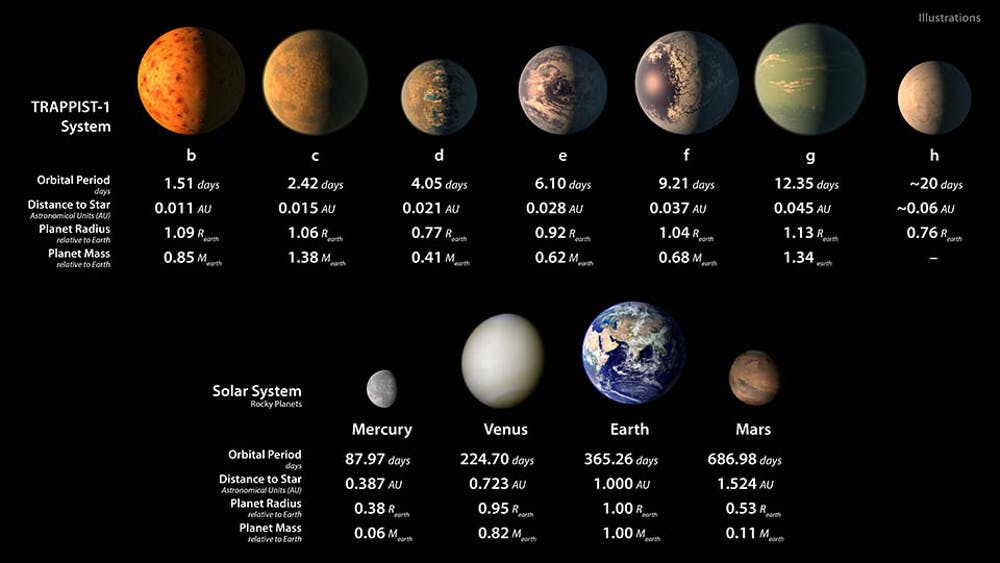

Picture taken from https://theconversation.com/its-our-solar-system-in-miniature-but-could-trappist-1-host-another-earth-73482

In [14]:
#Now removing some of the columns that has too much missing data 
def missing_data(f):
    count = len(exoplanets[exoplanets[f].isnull()])
    if count/len(exoplanets) > 0.40:
        return 1
    else:
        return 0
    
missing_values = [x for x in exoplanets.columns if missing_data(x)]
exoplanets = exoplanets.drop(missing_values, axis=1)


In [15]:
#Removing some of the columns that we do not need
remove=["tic_id","gaia_id","disc_refname","pl_letter","pl_nnotes","pl_tsystemref",
        "disc_year","disc_locale","st_nphot","st_nrvc","disc_pubdate","disc_facility"
       ,"disc_instrument","pl_refname","soltype","st_refname","sy_refname","pl_ntranspec;;;;;;"]

exoplanets=exoplanets.drop(remove,axis=1)

In [16]:
exoplanets.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_telescope,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,ttv_flag,pl_trandur,pl_trandurlim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,rowupdate,pl_pubdate,releasedate,st_nspec,pl_nespec,Habitable_Planets,P_Type,P_ESI
0,11 Com b,11 Com,1,2,1,0,0,Radial Velocity,2.16 m Telescope,1,0,0,0,0,0,0,0,0,0,0,326.03000,0.32,-0.32,0.0,1.29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,[Fe/H],2.31,0.10,-0.10,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.42177,140.383627,0.301395,-0.301395,-109.24100,0.316107,-0.316107,88.1701,0.277297,-0.277297,93.1846,1.9238,-1.9238,10.71040,0.219739,-0.219739,5.726,0.017000,-0.017000,4.72307,0.023,-0.023,2.943,0.334,-0.334,2.484,0.268,-0.268,2.282,0.346,-0.346,0.639,NaN,NaN,0.732,NaN,NaN,2.358,0.010,-0.010,2.270,4.44038,0.003848,-0.003848,3.83790,0.0071,-0.0071,NaN,2014-05-14,2008-01,2014-05-14,0,0,False,Jovian,0.083813
1,11 UMi b,11 UMi,1,1,1,0,0,Radial Velocity,2.0 m Alfred Jensch Telescope,1,0,0,0,0,0,0,0,0,0,0,516.21997,3.20,-3.20,0.0,1.53,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,0.218806,-0.218806,3.42996,0.231822,-0.231822,10.1132,0.217259,-0.217259,125.3210,1.9765,-1.9765,7.95388,0.124857,-0.124857,6.382,0.045000,-0.045000,5.01300,0.005,-0.005,2.876,0.230,-0.230,2.091,0.194,-0.194,1.939,0.270,-0.270,-0.290,NaN,NaN,0.143,NaN,NaN,1.894,0.012,-0.012,1.787,4.56216,0.003903,-0.003903,3.82294,0.0075,-0.0075,NaN,2018-09-04,2017-03,2018-09-06,0,0,False,Jovian,0.082414
2,14 And b,14 And,1,1,1,0,0,Radial Velocity,1.88 m Telescope,1,0,0,0,0,0,0,0,0,0,0,185.84000,0.23,-0.23,0.0,0.83,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4813.0,20.0,-20.0,0.0,11.00,1.00,-1.00,0.0,2.20,0.10,-0.20,0.0,-0.24,0.03,-0.03,0.0,[Fe/H],2.63,0.07,-0.07,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.96322,299.252618,0.182684,-0.182684,287.29200,0.185780,-0.185780,-83.7582,0.141256,-0.141256,75.4392,0.7140,-0.7140,13.22890,0.124501,-0.124501,6.256,0.017000,-0.017000,5.23133,0.023,-0.023,3.019,0.180,-0.180,2.608,0.184,-0.184,2.331,0.240,-0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,0.002826,-0.002826,4.32140,0.0073,-0.0073,NaN,2014-05-14,2008-12,2014-05-14,0,0,False,Jovian,0.081917
3,14 Her b,14 Her,1,1,1,0,0,Radial Velocity,10 m Keck I Telescope,1,0,0,0,0,0,0,0,0,0,0,1773.40002,2.50,-2.50,0.0,2.93,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5338.0,25.0,-25.0,0.0,0.93,0.01,-0.01,0.0,0.90,0.04,-0.04,0.0,0.41,NaN,NaN,0.0,[Fe/H],4.45,0.02,-0.02,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.251

In [17]:
exoplanets["Habitable_Planets"].describe()

count      4389
unique        2
top       False
freq       4335
Name: Habitable_Planets, dtype: object

In [18]:
exoplanets["sy_pnum"].nlargest(10)


1479    8
1480    8
1481    8
1482    8
1483    8
1484    8
1485    8
3743    8
4120    7
4121    7
Name: sy_pnum, dtype: int64

False    4335
True       54
Name: Habitable_Planets, dtype: int64


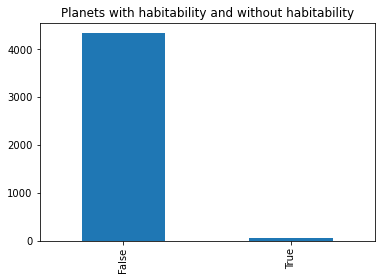

In [19]:
habitable_or_not=exoplanets["Habitable_Planets"].value_counts()
print(habitable_or_not)
habitable_or_not.plot(kind="bar",title="Planets with habitability and without habitability")

Text(0.5, 1.0, 'Temperature-Mass for Habitation')

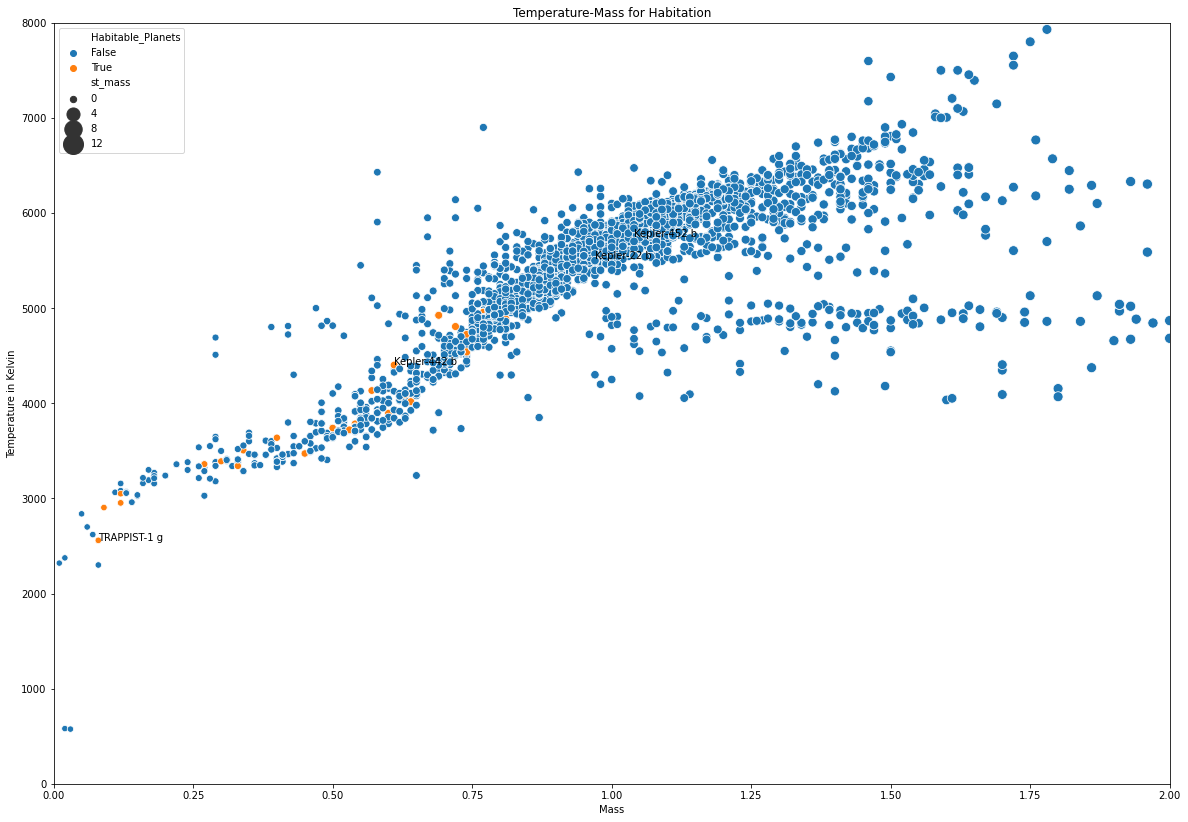

In [20]:
plt.figure(figsize=(20,14))
tm_rel_with_habitability=sns.scatterplot(x='st_mass', y='st_teff',
                     hue='Habitable_Planets', size='st_mass',
                     sizes=(40, 400),
                     data=exoplanets)
tm_rel_with_habitability.set(xlim=(0,2),ylim=(0,8000))
plt.text(x=exoplanets.st_mass[exoplanets.pl_name=="TRAPPIST-1 g"],y=exoplanets.st_teff[exoplanets.pl_name=="TRAPPIST-1 g"],s="TRAPPIST-1 g")
plt.text(x=exoplanets.st_mass[exoplanets.pl_name=="Kepler-442 b"],y=exoplanets.st_teff[exoplanets.pl_name=="Kepler-442 b"],s="Kepler-442 b")
plt.text(x=exoplanets.st_mass[exoplanets.pl_name=="Kepler-452 b"],y=exoplanets.st_teff[exoplanets.pl_name=="Kepler-452 b"],s="Kepler-452 b")
plt.text(x=exoplanets.st_mass[exoplanets.pl_name=="Kepler-22 b"],y=exoplanets.st_teff[exoplanets.pl_name=="Kepler-22 b"],s="Kepler-22 b")
tm_rel_with_habitability.set_xlabel("Mass")
tm_rel_with_habitability.set_ylabel("Temperature in Kelvin")
tm_rel_with_habitability.set_title("Temperature-Mass for Habitation")

Text(0.5, 1.0, 'Temperature-Mass for Habitation')

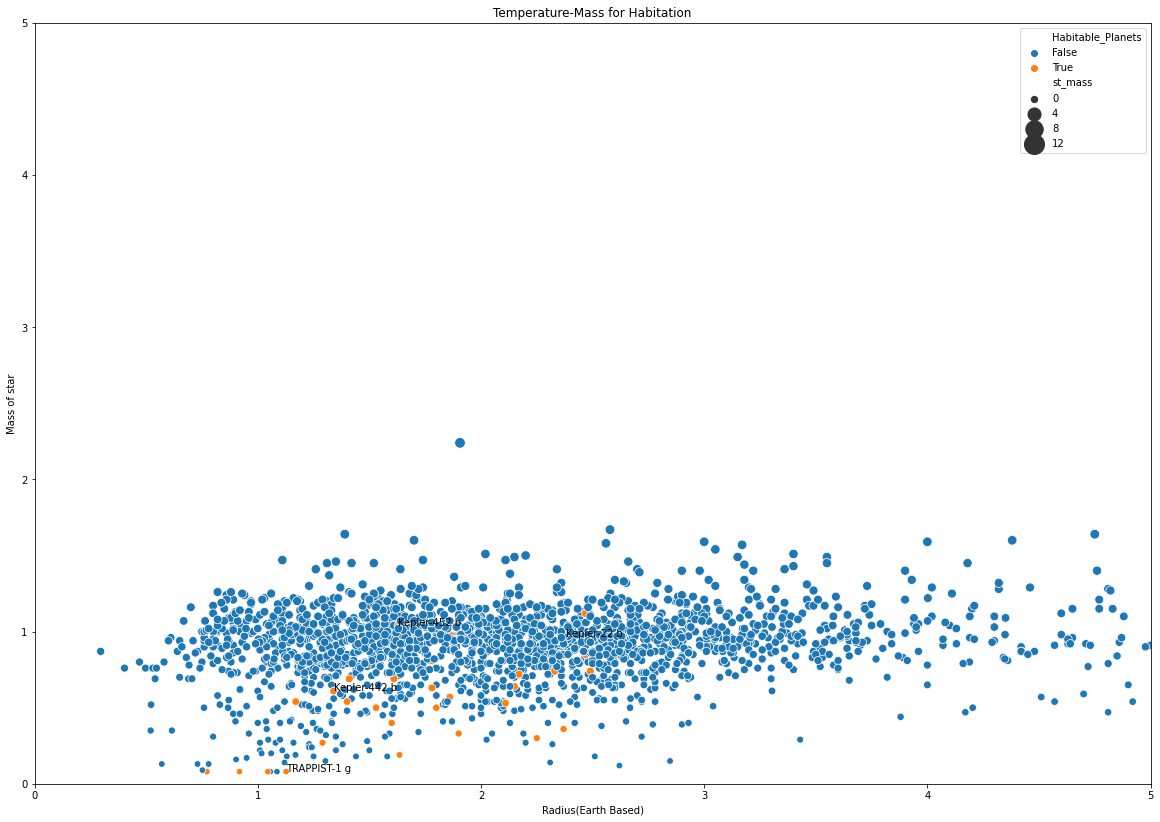

In [21]:
plt.figure(figsize=(20,14))
tm_rel_with_habitability=sns.scatterplot(y='st_mass', x='pl_rade',
                     hue='Habitable_Planets', size='st_mass',
                     sizes=(40, 400),
                     data=exoplanets)
tm_rel_with_habitability.set(xlim=(0,5),ylim=(0,5))
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="TRAPPIST-1 g"],y=exoplanets.st_mass[exoplanets.pl_name=="TRAPPIST-1 g"],s="TRAPPIST-1 g")
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-442 b"],y=exoplanets.st_mass[exoplanets.pl_name=="Kepler-442 b"],s="Kepler-442 b")
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-452 b"],y=exoplanets.st_mass[exoplanets.pl_name=="Kepler-452 b"],s="Kepler-452 b")
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-22 b"],y=exoplanets.st_mass[exoplanets.pl_name=="Kepler-22 b"],s="Kepler-22 b")
tm_rel_with_habitability.set_xlabel("Radius(Earth Based)")
tm_rel_with_habitability.set_ylabel("Mass of star")
tm_rel_with_habitability.set_title("Temperature-Mass for Habitation")

Text(0.5, 1.0, 'Orbital Period-Planet Radius')

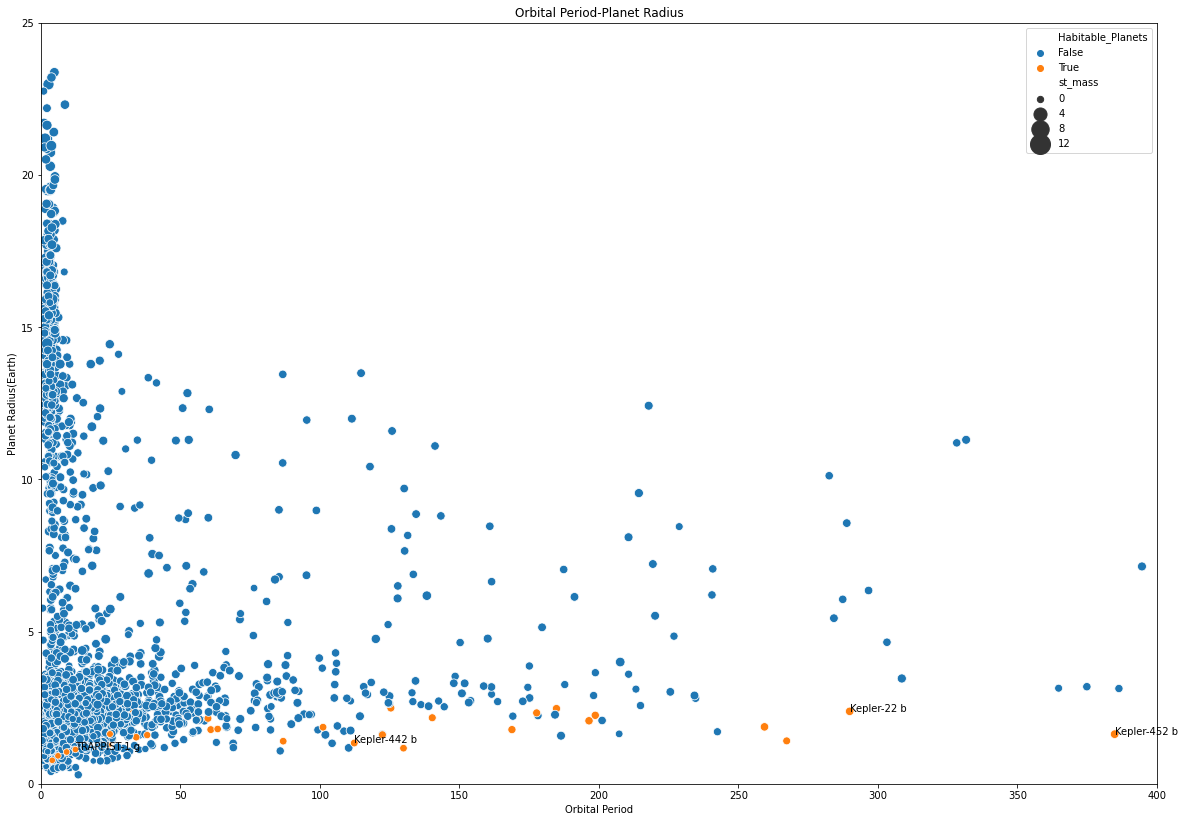

In [22]:
plt.figure(figsize=(20,14))
tm_rel_with_habitability=sns.scatterplot(x='pl_orbper', y='pl_rade',
                     hue='Habitable_Planets', size='st_mass',
                     sizes=(40, 400),
                     data=exoplanets)
tm_rel_with_habitability.set(xlim=(0,400),ylim=(0,25))
plt.text(x=exoplanets.pl_orbper[exoplanets.pl_name=="TRAPPIST-1 g"],y=exoplanets.pl_rade[exoplanets.pl_name=="TRAPPIST-1 g"],s="TRAPPIST-1 g")
plt.text(x=exoplanets.pl_orbper[exoplanets.pl_name=="Kepler-442 b"],y=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-442 b"],s="Kepler-442 b")
plt.text(x=exoplanets.pl_orbper[exoplanets.pl_name=="Kepler-452 b"],y=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-452 b"],s="Kepler-452 b")
plt.text(x=exoplanets.pl_orbper[exoplanets.pl_name=="Kepler-22 b"],y=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-22 b"],s="Kepler-22 b")
tm_rel_with_habitability.set_xlabel("Orbital Period")
tm_rel_with_habitability.set_ylabel("Planet Radius(Earth)")
tm_rel_with_habitability.set_title("Orbital Period-Planet Radius")

Text(0.5, 1.0, 'Temperature-Mass for Habitation')

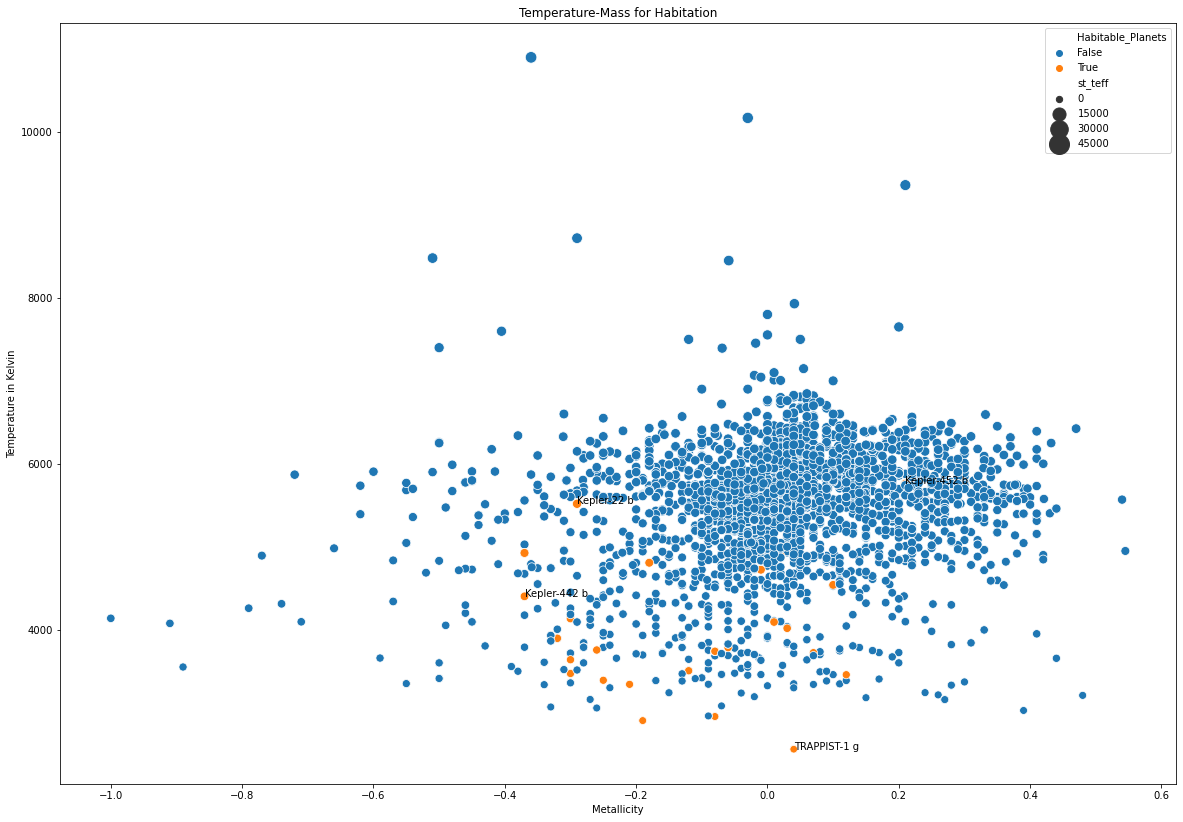

In [23]:
plt.figure(figsize=(20,14))
tm_rel_with_habitability2=sns.scatterplot(x='st_met', y='st_teff',
                     hue='Habitable_Planets', size='st_teff',
                     sizes=(40, 400),
                     data=exoplanets)
plt.text(x=exoplanets.st_met[exoplanets.pl_name=="TRAPPIST-1 g"],y=exoplanets.st_teff[exoplanets.pl_name=="TRAPPIST-1 g"],s="TRAPPIST-1 g")
plt.text(x=exoplanets.st_met[exoplanets.pl_name=="Kepler-442 b"],y=exoplanets.st_teff[exoplanets.pl_name=="Kepler-442 b"],s="Kepler-442 b")
plt.text(x=exoplanets.st_met[exoplanets.pl_name=="Kepler-452 b"],y=exoplanets.st_teff[exoplanets.pl_name=="Kepler-452 b"],s="Kepler-452 b")
plt.text(x=exoplanets.st_met[exoplanets.pl_name=="Kepler-22 b"],y=exoplanets.st_teff[exoplanets.pl_name=="Kepler-22 b"],s="Kepler-22 b")
tm_rel_with_habitability2.set_xlabel("Metallicity")
tm_rel_with_habitability2.set_ylabel("Temperature in Kelvin")
tm_rel_with_habitability2.set_title("Temperature-Mass for Habitation")

Text(0, 0.5, 'Stellar Metallicity')

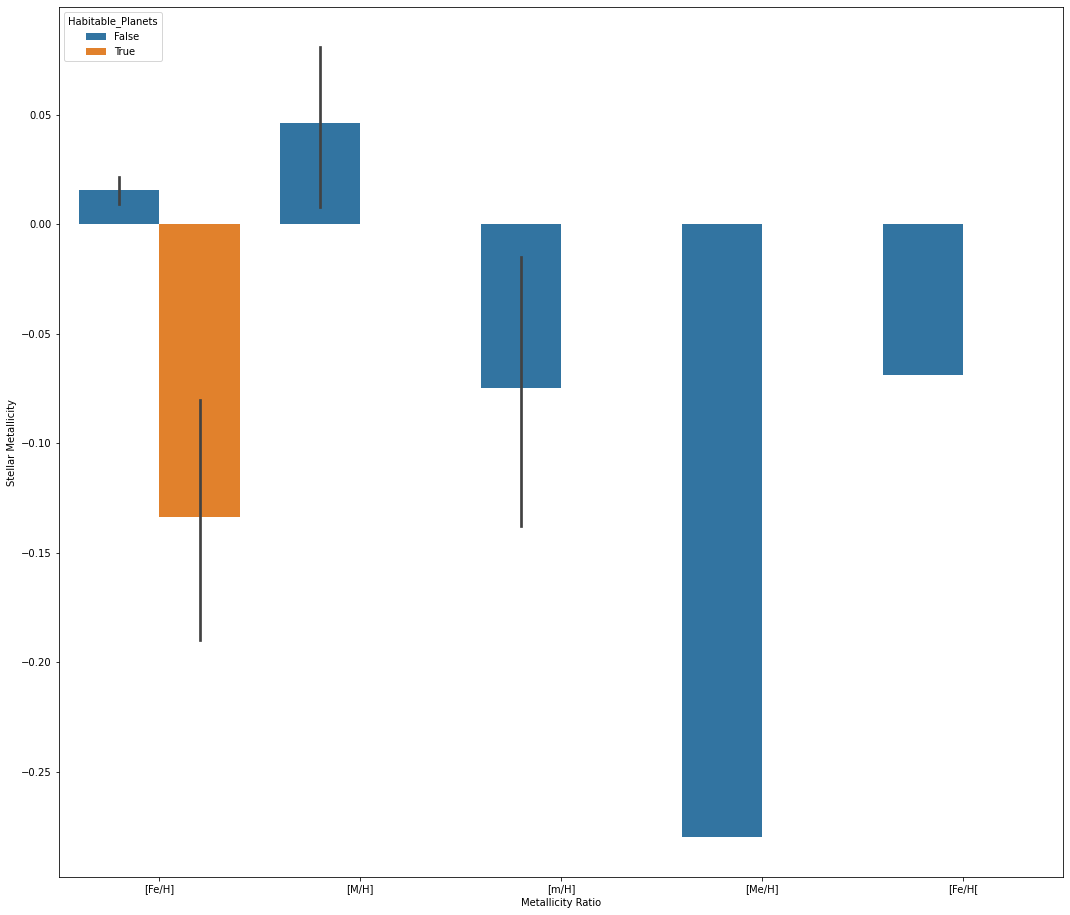

In [24]:
plt.figure(figsize=(18,16))
metallicty=sns.barplot(x="st_metratio",y="st_met",hue="Habitable_Planets",data=exoplanets)
plt.xlabel('Metallicity Ratio')
plt.ylabel('Stellar Metallicity')

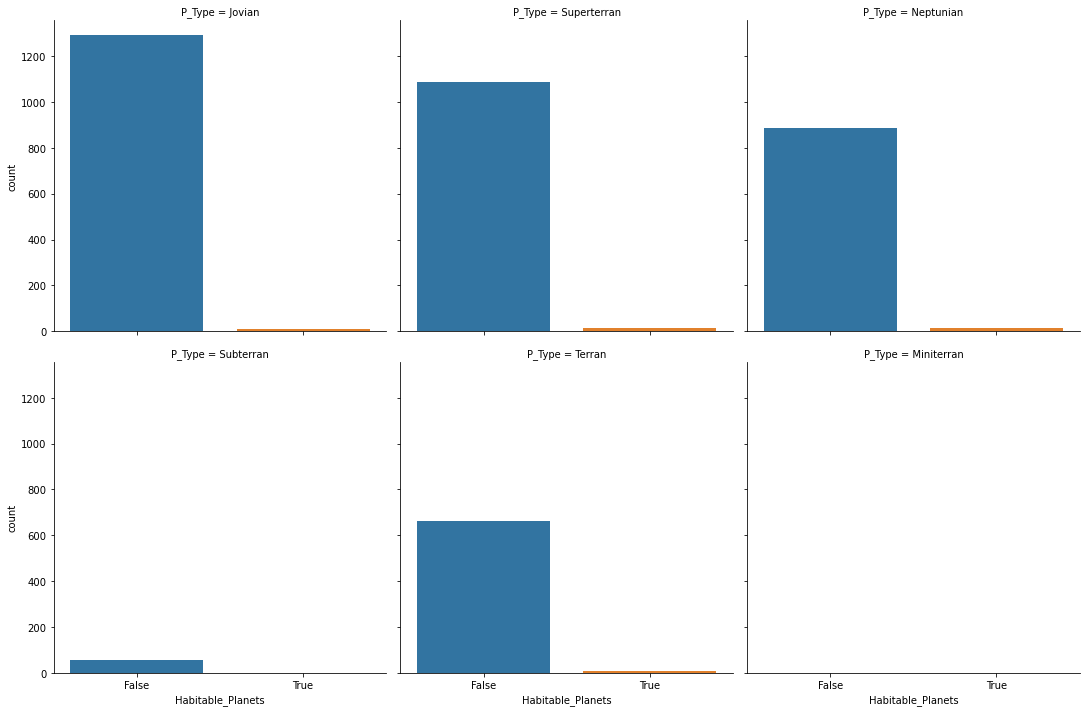

In [25]:
planets_type_habitability=sns.catplot("Habitable_Planets", col="P_Type", col_wrap=3, data=exoplanets, 
                                      kind="count")


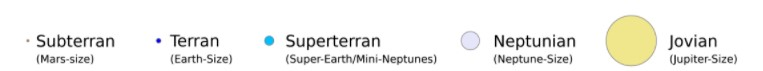

Text(0.5, 1.0, 'Radius-ESI')

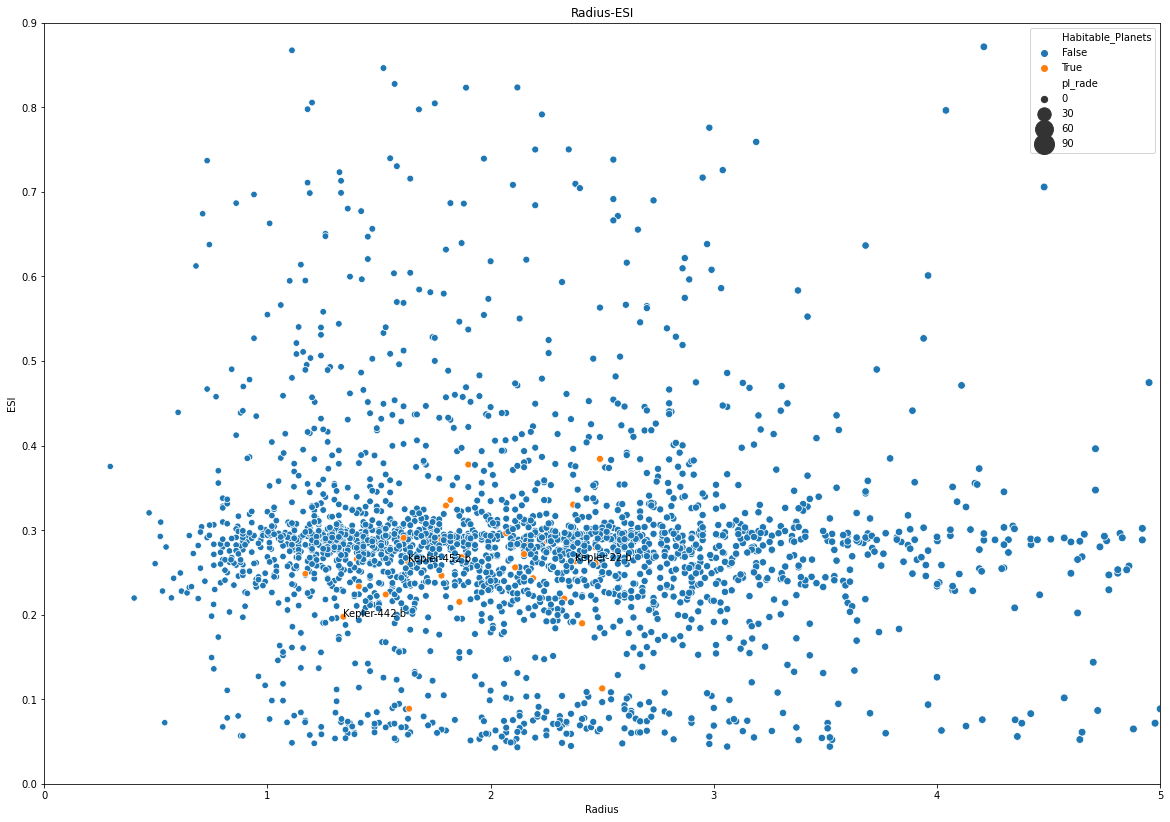

In [26]:
#ESI earth similarity index
plt.figure(figsize=(20,14))
tm_rel_with_habitability3=sns.scatterplot(x='pl_rade', y='P_ESI',
                     hue='Habitable_Planets', size='pl_rade',
                     sizes=(40, 400),
                     data=exoplanets)
plt.ylim(0, 0.9)
plt.xlim(0, 5)
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-442 b"],y=exoplanets.P_ESI[exoplanets.pl_name=="Kepler-442 b"],s="Kepler-442 b")
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-452 b"],y=exoplanets.P_ESI[exoplanets.pl_name=="Kepler-452 b"],s="Kepler-452 b")
plt.text(x=exoplanets.pl_rade[exoplanets.pl_name=="Kepler-22 b"],y=exoplanets.P_ESI[exoplanets.pl_name=="Kepler-22 b"],s="Kepler-22 b")
tm_rel_with_habitability3.set_xlabel("Radius")
tm_rel_with_habitability3.set_ylabel("ESI")
tm_rel_with_habitability3.set_title("Radius-ESI")

In [27]:
correlated=exoplanets.corr()
correlated

,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,ttv_flag,pl_trandur,pl_trandurlim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,ra,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,st_nspec,pl_nespec,Habitable_Planets,P_ESI
default_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sy_snum,NaN,1.000000,0.021618,NaN,0.258757,0.232324,0.003346,-0.006768,-0.164432,0.051868,0.053026,-0.029719,0.161082,0.017613,-0.004785,0.063151,-0.006215,-0.005103,0.005315,0.003981,-0.007450,-0.023736,0.199093,0.021405,-0.039507,0.035835,0.199021,0.021336,-0.039486,0.035835,0.107522,0.051624,-0.050465,NaN,-0.012691,-0.058589,NaN,0.031920,-0.102959,0.093165,-0.004830,0.026408,-0.020623,0.021073,NaN,0.054974,0.015184,-1.743446e-02,NaN,-0.013481,-0.077031,0.101636,0.008459,-0.023685,-0.096616,0.121260,NaN,-0.129283,-0.120529,-0.052655,0.108122,-0.139104,-0.126564,0.105483,0.049647,-0.049118,0.005697,0.049480,-0.048972,-0.063214,0.048126,-0.047603,-0.144373,-0.055499,0.052484,0.137783,0.129533,-0.129533,-0.250061,0.057932,-0.057932,-0.245331,-0.089206,0.057243,-0.251102,0.019599,-0.024352,-0.245502,0.022150,-0.020744,-0.246948,-0.006034,0.005908,-0.225068,0.092888,-0.092888,-0.226729,0.047829,-0.047829,-0.225302,-0.217222,0.217222,-0.154332,-0.252570,0.126680,-0.126680,-0.250614,0.040210,-0.040210,-0.248309,0.080183,0.096844,0.034187,-0.066309
sy_pnum,NaN,0.021618,1.000000,NaN,-0.035741,-0.035946,0.002392,-0.014331,0.030392,0.024985,-0.025957,-0.096572,-0.014804,-0.040402,-0.010132,0.087254,-0.014307,-0.011915,0.011821,0.029785,-0.055244,0.011619,-0.247127,-0.062351,0.056022,-0.077122,-0.246957,-0.062368,0.056211,-0.077122,0.005893,0.029443,-0.031259,NaN,0.270695,-0.015533,NaN,-0.055061,0.054286,-0.020229,-0.010369,-0.086757,-0.024905,0.016374,NaN,-0.110109,-0.029537,2.801152e-02,NaN,-0.098749,-0.114558,0.154604,-0.009834,0.126136,0.241547,-0.101261,NaN,0.045934,0.070953,-0.039314,-0.048108,0.068218,0.063277,0.100561,0.054766,-0.054986,0.082569,0.054323,-0.054479,-0.022623,0.054264,-0.054482,-0.116865,-0.103720,0.096773,0.115654,-0.021604,0.021604,0.000278,0.022696,-0.022696,-0.008025,0.032050,-0.012822,-0.025257,-0.011303,0.009084,-0.031507,-0.016545,0.015601,-0.031583,-0.022540,0.021960,0.030102,-0.013511,0.013511,0.029613,-0.026703,0.026703,0.034052,0.018769,-0.018769,0.051854,-0.012699,0.004531,-0.004531,-0.016341,0.034147,-0.034147,-0.068204,0.139167,-0.030070,0.094315,0.057044
sy_mnum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [28]:
habitability_correlation=pd.DataFrame(correlated["Habitable_Planets"].sort_values(ascending=False))
habitability_correlation

,Habitable_Planets
Habitable_Planets,1.000000
sy_plx,0.234903
sy_pm,0.180216
sy_pmraerr1,0.138391
sy_pmerr1,0.138018
...,...
pl_tranmidlim,NaN
pl_trandurlim,NaN
st_radlim,NaN
st_masslim,NaN


C:\Users\baran\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\baran\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1440x504 with 0 Axes>

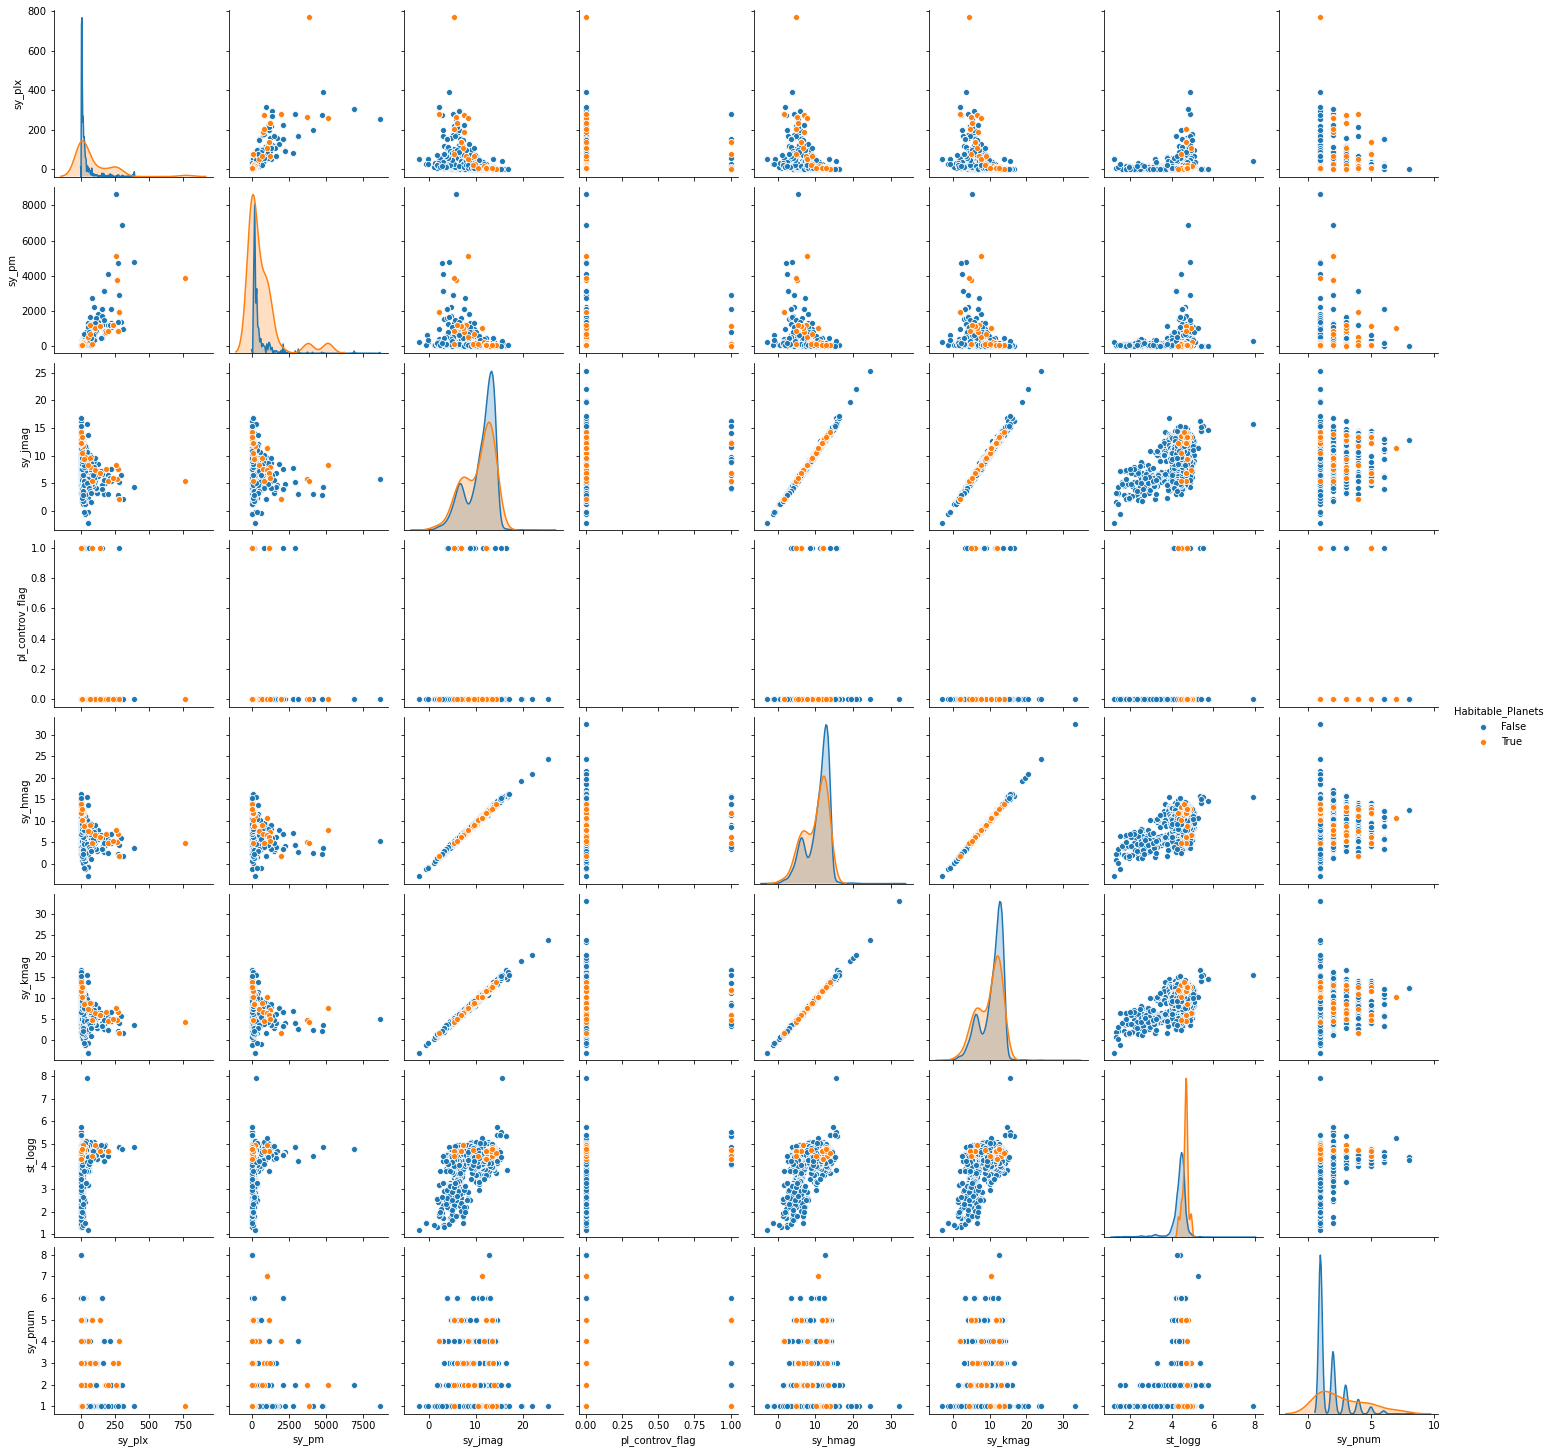

In [29]:
plt.figure(figsize = (20,7))
sns.pairplot(exoplanets[['Habitable_Planets',"sy_plx",'sy_pm', 'sy_jmag', 'pl_controv_flag',
                 'sy_hmag', 'sy_kmag', 'st_logg', 'sy_pnum']], hue='Habitable_Planets')

<Figure size 1440x504 with 0 Axes>

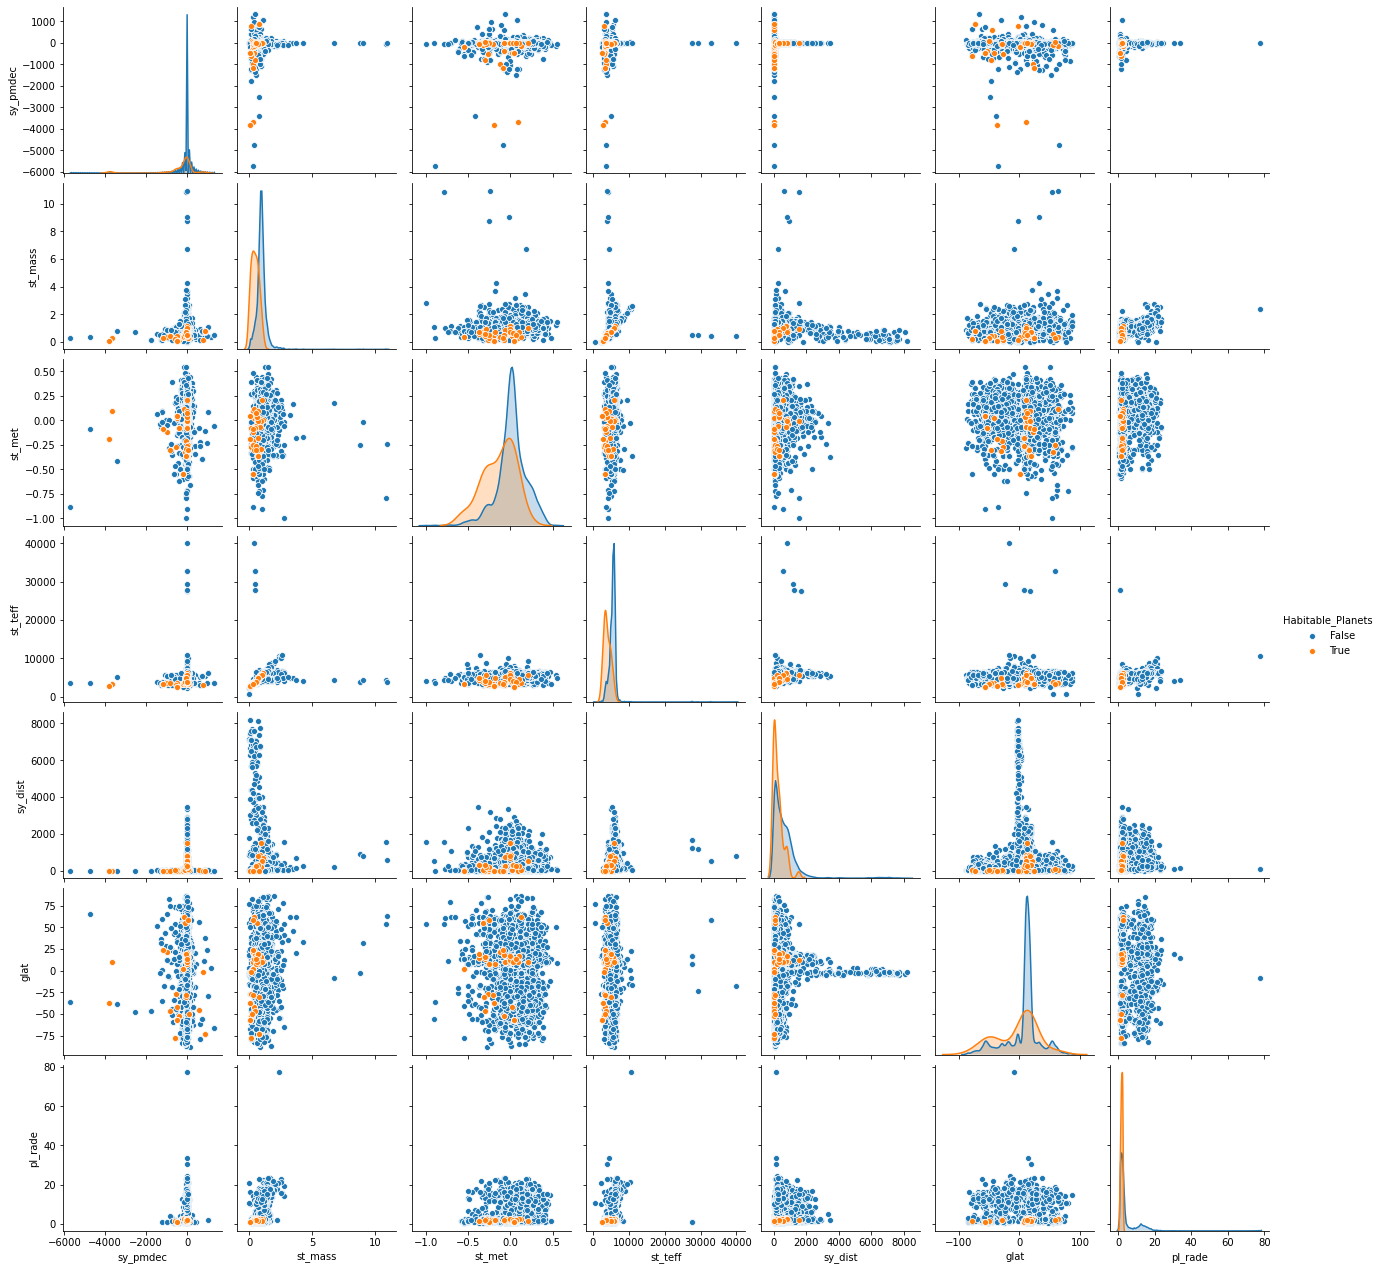

In [30]:
plt.figure(figsize = (20,7))
sns.pairplot(exoplanets[['Habitable_Planets', 'sy_pmdec' ,'st_mass', 'st_met', 'st_teff',
                 'sy_dist', 'glat',"pl_rade"]], hue='Habitable_Planets')

In [31]:
correlated['Habitable_Planets'].nsmallest(25)

sy_pmdec         -0.145068
sy_pmraerr2      -0.138507
sy_pmerr2        -0.138150
sy_pmdecerr2     -0.137061
st_mass          -0.118945
st_teff          -0.115697
st_met           -0.102738
sy_plxerr2       -0.085041
pl_rade          -0.053319
pl_radj          -0.053273
sy_dist          -0.046466
glat             -0.042214
sy_vmagerr2      -0.040969
sy_gaiamagerr2   -0.032469
st_rad           -0.029828
sy_kmag          -0.029024
st_loggerr1      -0.028679
elat             -0.027272
dec              -0.025611
pl_radeerr1      -0.025340
pl_radjerr1      -0.025296
sy_hmag          -0.025276
st_tefferr1      -0.024531
sy_disterr1      -0.022009
sy_tmagerr2      -0.021815
Name: Habitable_Planets, dtype: float64

In [32]:
correlated['Habitable_Planets'].nlargest(25)

Habitable_Planets    1.000000
sy_plx               0.234903
sy_pm                0.180216
sy_pmraerr1          0.138391
sy_pmerr1            0.138018
sy_pmdecerr1         0.136922
pl_controv_flag      0.131859
sy_pnum              0.094315
sy_plxerr1           0.085041
pl_trandur           0.076308
sy_pmra              0.074971
sy_vmagerr1          0.069302
st_logg              0.066275
sy_bmag              0.057318
sy_vmag              0.039122
sy_snum              0.034187
st_loggerr2          0.033216
sy_gaiamagerr1       0.032469
sy_kepmag            0.031774
pl_radeerr2          0.030433
pl_radjerr2          0.030196
st_meterr1           0.030109
sy_w3mag             0.028989
sy_w1mag             0.027306
sy_w2mag             0.026154
Name: Habitable_Planets, dtype: float64

In [33]:
distance_travel=exoplanets[['sy_dist', 'Habitable_Planets', 'st_mass']]
distance_travel

,sy_dist,Habitable_Planets,st_mass
0,93.1846,False,2.70
1,125.3210,False,2.78
2,75.4392,False,2.20
3,17.9323,False,0.90
4,21.1397,False,1.08
...,...,...,...
4384,112.5370,False,2.30
4385,13.4054,False,1.30
4386,13.4054,False,1.30
4387,13.4054,False,1.30


ML PART


In [34]:
habitability_correlation.tail(10)

,Habitable_Planets
sy_pmerr2,-0.138150
sy_pmraerr2,-0.138507
sy_pmdec,-0.145068
default_flag,NaN
sy_mnum,NaN
pl_tranmidlim,NaN
pl_trandurlim,NaN
st_radlim,NaN
st_masslim,NaN
st_logglim,NaN


In [35]:
newexoplanets=exoplanets.copy()

In [36]:
drop_col=["pl_trandurlim","pl_tranmidlim","sy_mnum","sy_pmraerr2","sy_pmdecerr2","sy_pmerr2"]
newexoplanets = newexoplanets.drop(drop_col, axis=1)

In [37]:
newexoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Columns: 119 entries, pl_name to P_ESI
dtypes: bool(1), float64(89), int64(18), object(11)
memory usage: 4.0+ MB


In [38]:
newexoplanets["sy_jmh2"]=newexoplanets["sy_jmag"]-newexoplanets["sy_hmag"]
newexoplanets["sy_hmk2"]=newexoplanets["sy_hmag"]-newexoplanets["sy_kmag"]
newexoplanets["sy_jmk2"]=newexoplanets["sy_jmag"]-newexoplanets["sy_kmag"]

In [39]:
newexoplanets = newexoplanets[['sy_pnum', 'pl_controv_flag', 'pl_rade', 'pl_orbper', 'st_teff',
                       'st_mass', 'sy_pm', 'sy_pmdec', 'st_met', 'st_logg', 'sy_jmh2',
                       'sy_jmk2', 'sy_hmk2', 'Habitable_Planets']]
newexoplanets.describe()

,sy_pnum,pl_controv_flag,pl_rade,pl_orbper,st_teff,st_mass,sy_pm,sy_pmdec,st_met,st_logg,sy_jmh2,sy_jmk2,sy_hmk2
count,4389.000000,4389.000000,3361.000000,4.242000e+03,4057.000000,3665.000000,4248.000000,4248.000000,3036.000000,3804.000000,4254.000000,4254.000000,4256.000000
mean,1.786967,0.005468,4.291079,3.921758e+03,5450.813138,0.978497,103.203986,-35.747486,0.013876,4.359464,0.394334,0.490234,0.095756
std,1.172635,0.073753,4.802661,1.667381e+05,1436.945511,0.479144,370.743715,231.228586,0.176048,0.431965,0.141926,0.196451,0.083072
min,1.000000,0.000000,0.296000,9.070629e-02,575.000000,0.010000,0.158639,-5709.220000,-1.000000,1.200000,-0.237000,-0.287000,-0.906000
25%,1.000000,0.000000,1.589000,4.454956e+00,4995.000000,0.800000,7.685381,-20.356100,-0.070000,4.290000,0.294000,0.356000,0.053000
50%,1.000000,0.000000,2.360000,1.172152e+01,5577.000000,0.960000,16.382090,-6.459950,0.020000,4.450000,0.363000,0.436000,0.082000
75%,2.000000,0.000000,3.680000,4.150555e+01,5911.000000,1.120000,51.091116,2.311472,0.110000,4.560000,0.484000,0.587000,0.121250
max,8.000000,1.000000,77.342000,8.040000e+06,40000.000000,10.940000,8644.904613,1326.660000,0.545000,7.920000,1.357000,2.182000,0.981000


In [40]:
newexoplanets.dropna(inplace=True)
newexoplanets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 29 to 4375
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sy_pnum            2304 non-null   int64  
 1   pl_controv_flag    2304 non-null   int64  
 2   pl_rade            2304 non-null   float64
 3   pl_orbper          2304 non-null   float64
 4   st_teff            2304 non-null   float64
 5   st_mass            2304 non-null   float64
 6   sy_pm              2304 non-null   float64
 7   sy_pmdec           2304 non-null   float64
 8   st_met             2304 non-null   float64
 9   st_logg            2304 non-null   float64
 10  sy_jmh2            2304 non-null   float64
 11  sy_jmk2            2304 non-null   float64
 12  sy_hmk2            2304 non-null   float64
 13  Habitable_Planets  2304 non-null   bool   
dtypes: bool(1), float64(11), int64(2)
memory usage: 254.2 KB


In [41]:
#Splitting the data

X_train,X_test,y_train,y_test=train_test_split(newexoplanets.iloc[:,:-1],newexoplanets.loc[:,"Habitable_Planets"],test_size=0.3,random_state=42)
X_train.shape

(1612, 13)

In [42]:
newexoplanets["Habitable_Planets"] = newexoplanets["Habitable_Planets"].astype(float)
newexoplanets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 29 to 4375
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sy_pnum            2304 non-null   int64  
 1   pl_controv_flag    2304 non-null   int64  
 2   pl_rade            2304 non-null   float64
 3   pl_orbper          2304 non-null   float64
 4   st_teff            2304 non-null   float64
 5   st_mass            2304 non-null   float64
 6   sy_pm              2304 non-null   float64
 7   sy_pmdec           2304 non-null   float64
 8   st_met             2304 non-null   float64
 9   st_logg            2304 non-null   float64
 10  sy_jmh2            2304 non-null   float64
 11  sy_jmk2            2304 non-null   float64
 12  sy_hmk2            2304 non-null   float64
 13  Habitable_Planets  2304 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 270.0 KB


In [43]:

X_smoted, y_smoted = SMOTE(sampling_strategy='minority', random_state=76).fit_resample(X_train, y_train)
X_smoted.shape
#SMOTE is the minority class and is referred to as the Synthetic Minority Oversampling Technique.

(3196, 13)

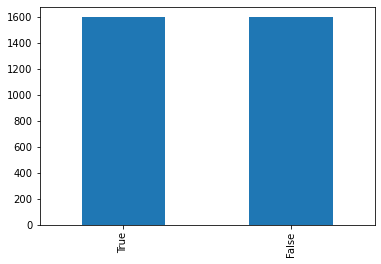

In [44]:
pd.Series(y_smoted).value_counts().plot.bar()

In [45]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_smoted, y_smoted)
y_pred_l = lr.predict(X_test)
print("training set:",lr.score(X_smoted,y_smoted))
print("test set:",accuracy_score(y_test,y_pred_l))
print("prec score:",precision_score(y_test, y_pred_l,average="macro"))
print("rec score:", recall_score(y_test, y_pred_l,average="macro"))
print("f1 score:", f1_score(y_test, y_pred_l,average="macro"))



print(classification_report(y_test,y_pred_l))

training set: 0.9755944931163955
test set: 0.9566473988439307
prec score: 0.5833333333333334
rec score: 0.9781341107871719
f1 score: 0.6316797956142218
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       686
        True       0.17      1.00      0.29         6

    accuracy                           0.96       692
   macro avg       0.58      0.98      0.63       692
weighted avg       0.99      0.96      0.97       692



C:\Users\baran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_smoted, y_smoted)
y_pred = dt.predict(X_test)



print("training set:",dt.score(X_smoted,y_smoted))
print("test set:",accuracy_score(y_test,y_pred))
print("prec score:",precision_score(y_test, y_pred,average="macro"))
print("rec score:", recall_score(y_test, y_pred,average="macro"))
print("f1 score:", f1_score(y_test, y_pred,average="macro"))



print(classification_report(y_test,y_pred))

training set: 1.0
test set: 0.9913294797687862
prec score: 0.7478134110787171
rec score: 0.7478134110787171
f1 score: 0.7478134110787171
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       686
        True       0.50      0.50      0.50         6

    accuracy                           0.99       692
   macro avg       0.75      0.75      0.75       692
weighted avg       0.99      0.99      0.99       692



In [47]:
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dt.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(16)

,importance
feature,
pl_orbper,0.779072
pl_rade,0.158301
st_mass,0.021469
st_logg,0.014463
st_teff,0.011440
sy_jmh2,0.003615
st_met,0.003162
sy_pmdec,0.002425
sy_jmk2,0.002419


In [48]:
#K nearest neighbor model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_smoted, y_smoted)
y_pred_knn = knn.predict(X_test)

print("training set:",dt.score(X_smoted,y_smoted))
print("test set:",accuracy_score(y_test,y_pred_knn))
print("prec score:",precision_score(y_test, y_pred_knn,average="macro"))
print("rec score:", recall_score(y_test, y_pred_knn,average="macro"))
print("f1 score:", f1_score(y_test, y_pred_knn,average="macro"))



print(classification_report(y_test,y_pred_knn))

training set: 1.0
test set: 0.9696531791907514
prec score: 0.5992503748125937
rec score: 0.902089407191448
f1 score: 0.653529790429869
              precision    recall  f1-score   support

       False       1.00      0.97      0.98       686
        True       0.20      0.83      0.32         6

    accuracy                           0.97       692
   macro avg       0.60      0.90      0.65       692
weighted avg       0.99      0.97      0.98       692



In [49]:
#Naive Bayes model
nbg = GaussianNB()
nbg.fit(X_smoted, y_smoted)
y_pred_n = nbg.predict(X_test)

print("training set:",dt.score(X_smoted,y_smoted))
print("test set:",accuracy_score(y_test,y_pred_n))
print("prec score:",precision_score(y_test, y_pred_n,average="macro"))
print("rec score:", recall_score(y_test, y_pred_n,average="macro"))
print("f1 score:", f1_score(y_test, y_pred_n,average="macro"))



print(classification_report(y_test,y_pred_n))

training set: 1.0
test set: 0.7514450867052023
prec score: 0.5095637509430613
rec score: 0.7094266277939747
f1 score: 0.45079365079365075
              precision    recall  f1-score   support

       False       1.00      0.75      0.86       686
        True       0.02      0.67      0.04         6

    accuracy                           0.75       692
   macro avg       0.51      0.71      0.45       692
weighted avg       0.99      0.75      0.85       692



In [50]:
#Support Vector Machine model
svc = SVC(kernel='linear',C=1.1)
svc.fit(X_smoted, y_smoted)
y_pred_s = svc.predict(X_test)

print("training set:",dt.score(X_smoted,y_smoted))
print("test set:",accuracy_score(y_test,y_pred_s))
print("prec score:",precision_score(y_test, y_pred_s,average="macro"))
print("rec score:", recall_score(y_test, y_pred_s,average="macro"))
print("f1 score:", f1_score(y_test, y_pred_s,average="macro"))



print(classification_report(y_test,y_pred_s))

training set: 1.0
test set: 0.9609826589595376
prec score: 0.5909090909090909
rec score: 0.9803206997084548
f1 score: 0.6438089791249643
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       686
        True       0.18      1.00      0.31         6

    accuracy                           0.96       692
   macro avg       0.59      0.98      0.64       692
weighted avg       0.99      0.96      0.97       692



In [51]:
#Xgboost model
xgboost = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

xgboost.fit(X_smoted, y_smoted)
y_predx = xgboost.predict(X_test)

print("training set:",dt.score(X_smoted,y_smoted))
print("test set:",accuracy_score(y_test,y_predx))
print("prec score:",precision_score(y_test, y_predx,average="macro"))
print("rec score:", recall_score(y_test, y_predx,average="macro"))
print("f1 score:", f1_score(y_test, y_predx,average="macro"))



print(classification_report(y_test,y_predx))

training set: 1.0
test set: 0.9913294797687862
prec score: 0.75
rec score: 0.9956268221574345
f1 score: 0.831137140068326
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       686
        True       0.50      1.00      0.67         6

    accuracy                           0.99       692
   macro avg       0.75      1.00      0.83       692
weighted avg       1.00      0.99      0.99       692



In [52]:
ml_models_performance={
    "LogisticRegression":{
    "Train set":accuracy_score(y_test,y_pred_l),
    "Test set":accuracy_score(y_test,y_pred_l),
    "Precision":precision_score(y_test, y_pred_l,average="macro"),
    "Recall":recall_score(y_test, y_pred_l,average="macro"),
    "f1-score":f1_score(y_test, y_pred_l,average="macro")},
    "K-Nearest Neighbors":{
    "Train set":accuracy_score(y_test,y_pred_knn),
    "Test set":accuracy_score(y_test,y_pred_knn),
    "Precision":precision_score(y_test, y_pred_knn,average="macro"),
    "Recall":recall_score(y_test, y_pred_knn,average="macro"),
    "f1-score":f1_score(y_test, y_pred_knn,average="macro")   
    },
    "XGBoost":{
    "Train set":accuracy_score(y_test,y_predx),
    "Test set":accuracy_score(y_test,y_predx),
    "Precision":precision_score(y_test, y_predx,average="macro"),
    "Recall":recall_score(y_test, y_predx,average="macro"),
    "f1-score":f1_score(y_test, y_predx,average="macro")   
    },
    "Naive_Bayes(Gaussian)":{
    "Train set":accuracy_score(y_test,y_pred_n),
    "Test set":accuracy_score(y_test,y_pred_n),
    "Precision":precision_score(y_test, y_pred_n,average="macro"),
    "Recall":recall_score(y_test, y_pred_n,average="macro"),
    "f1-score":f1_score(y_test, y_pred_n,average="macro")     
    },
    "Decision Tree":{
    "Train set":accuracy_score(y_test,y_pred),
    "Test set":accuracy_score(y_test,y_pred),
    "Precision":precision_score(y_test, y_pred,average="macro"),
    "Recall":recall_score(y_test, y_pred,average="macro"),
    "f1-score":f1_score(y_test, y_pred,average="macro")       
    },
    "SVC":{
     "Train set":accuracy_score(y_test,y_pred),
    "Test set":accuracy_score(y_test,y_pred),
    "Precision":precision_score(y_test, y_pred,average="macro"),
    "Recall":recall_score(y_test, y_pred,average="macro"),
    "f1-score":f1_score(y_test, y_pred,average="macro")        
    }
    
}
ml_models_performance

{'LogisticRegression': {'Train set': 0.9566473988439307,
  'Test set': 0.9566473988439307,
  'Precision': 0.5833333333333334,
  'Recall': 0.9781341107871719,
  'f1-score': 0.6316797956142218},
 'K-Nearest Neighbors': {'Train set': 0.9696531791907514,
  'Test set': 0.9696531791907514,
  'Precision': 0.5992503748125937,
  'Recall': 0.902089407191448,
  'f1-score': 0.653529790429869},
 'XGBoost': {'Train set': 0.9913294797687862,
  'Test set': 0.9913294797687862,
  'Precision': 0.75,
  'Recall': 0.9956268221574345,
  'f1-score': 0.831137140068326},
 'Naive_Bayes(Gaussian)': {'Train set': 0.7514450867052023,
  'Test set': 0.7514450867052023,
  'Precision': 0.5095637509430613,
  'Recall': 0.7094266277939747,
  'f1-score': 0.45079365079365075},
 'Decision Tree': {'Train set': 0.9913294797687862,
  'Test set': 0.9913294797687862,
  'Precision': 0.7478134110787171,
  'Recall': 0.7478134110787171,
  'f1-score': 0.7478134110787171},
 'SVC': {'Train set': 0.9913294797687862,
  'Test set': 0.99132

In [53]:
pd.DataFrame.from_dict(ml_models_performance)

,LogisticRegression,K-Nearest Neighbors,XGBoost,Naive_Bayes(Gaussian),Decision Tree,SVC
Train set,0.956647,0.969653,0.991329,0.751445,0.991329,0.991329
Test set,0.956647,0.969653,0.991329,0.751445,0.991329,0.991329
Precision,0.583333,0.599250,0.750000,0.509564,0.747813,0.747813
Recall,0.978134,0.902089,0.995627,0.709427,0.747813,0.747813
f1-score,0.631680,0.653530,0.831137,0.450794,0.747813,0.747813


Text(0.5, 1.0, 'Confusion Matrix  XGBoost')

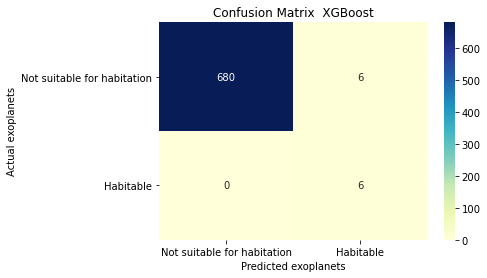

In [54]:
#Confusion Matrix of xgboost


conf_xg = confusion_matrix(y_test, y_predx)
sns.heatmap(conf_xg,annot=True, cmap="YlGnBu",fmt='d',
               xticklabels=['Not suitable for habitation', 'Habitable'],
               yticklabels=['Not suitable for habitation', 'Habitable'])

plt.xlabel('Predicted exoplanets')
plt.ylabel('Actual exoplanets')

plt.title('Confusion Matrix  XGBoost')
#  (True Positive – TP) = 6
#  (True Negative – TN) = 908
#  (False Positive – FP) = 5
#  (False Negative – FN) = 3

Text(0.5, 1.0, 'Confusion Matrix SVC')

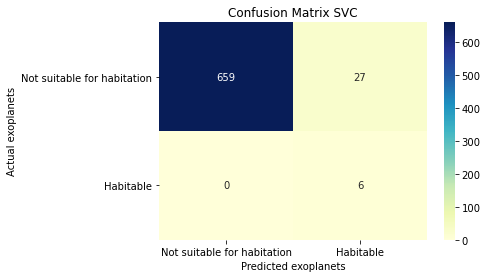

In [55]:
#Confusion matrix of svc
conf_svc = confusion_matrix(y_test, y_pred_s)
sns.heatmap(conf_svc, cmap="YlGnBu", annot=True,fmt='d',
               xticklabels=['Not suitable for habitation', 'Habitable'],
               yticklabels=['Not suitable for habitation', 'Habitable'])
plt.xlabel('Predicted exoplanets')
plt.ylabel('Actual exoplanets')

plt.title('Confusion Matrix SVC')

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

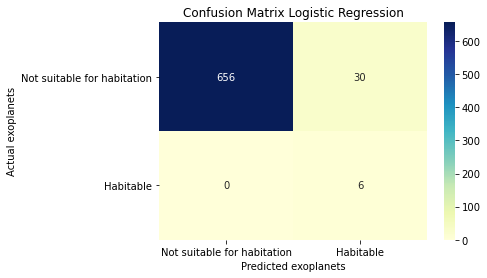

In [56]:
#Confusion matrix of logistic regression
conf_l = confusion_matrix(y_test, y_pred_l)
sns.heatmap(conf_l, cmap="YlGnBu", annot=True,fmt='d',
               xticklabels=['Not suitable for habitation', 'Habitable'],
               yticklabels=['Not suitable for habitation', 'Habitable'])
plt.xlabel('Predicted exoplanets')
plt.ylabel('Actual exoplanets')

plt.title('Confusion Matrix Logistic Regression')

Text(0.5, 1.0, 'Confusion Matrix KNN')

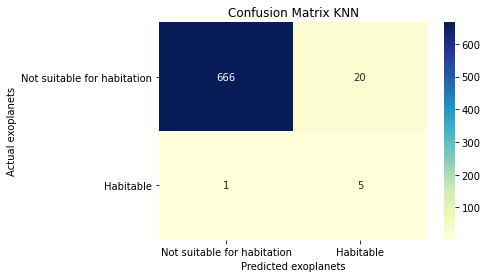

In [57]:
#Confusion matrix of knn
conf_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_knn,cmap="YlGnBu", annot=True,fmt='d',
               xticklabels=['Not suitable for habitation', 'Habitable'],
               yticklabels=['Not suitable for habitation', 'Habitable'])
plt.xlabel('Predicted exoplanets')
plt.ylabel('Actual exoplanets')

plt.title('Confusion Matrix KNN')

Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

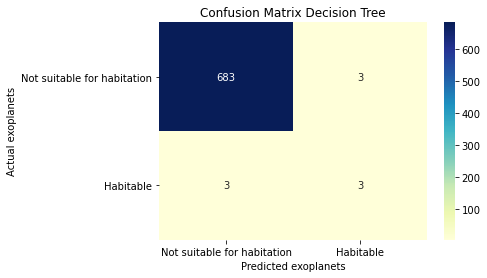

In [58]:
#Confusion matrix of decision tree
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, cmap="YlGnBu", annot=True, fmt='d',
               xticklabels=['Not suitable for habitation', 'Habitable'],
               yticklabels=['Not suitable for habitation', 'Habitable'])
plt.xlabel('Predicted exoplanets')
plt.ylabel('Actual exoplanets')

plt.title('Confusion Matrix Decision Tree')

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

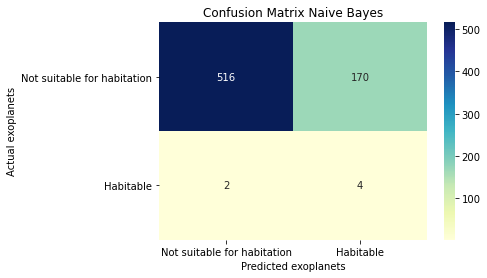

In [59]:
#Confusion matrix of naive bayes
conf_n = confusion_matrix(y_test, y_pred_n)
sns.heatmap(conf_n, cmap="YlGnBu", annot=True,fmt='d',
               xticklabels=['Not suitable for habitation', 'Habitable'],
               yticklabels=['Not suitable for habitation', 'Habitable'])
plt.xlabel('Predicted exoplanets')
plt.ylabel('Actual exoplanets')

plt.title('Confusion Matrix Naive Bayes')

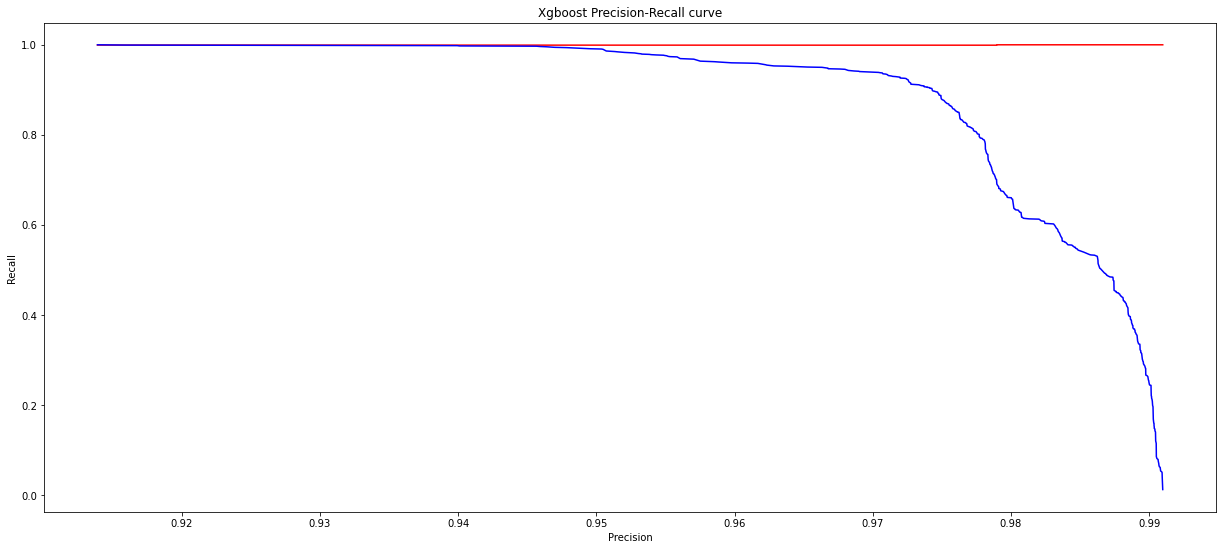

In [60]:
#Precision Recall Curve for xgboost
y_scores = xgboost.predict_proba(X_smoted)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_smoted, y_scores)
plt.figure(figsize = (21, 9))
plt.plot(threshold, precision[:-1], "r-")
plt.plot(threshold, recall[:-1], "b")    
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("Xgboost Precision-Recall curve")
plt.show()
#high precision =low false positive rate
#high recall = low false negative rate.

ROC AUC score =  0.9973275024295434


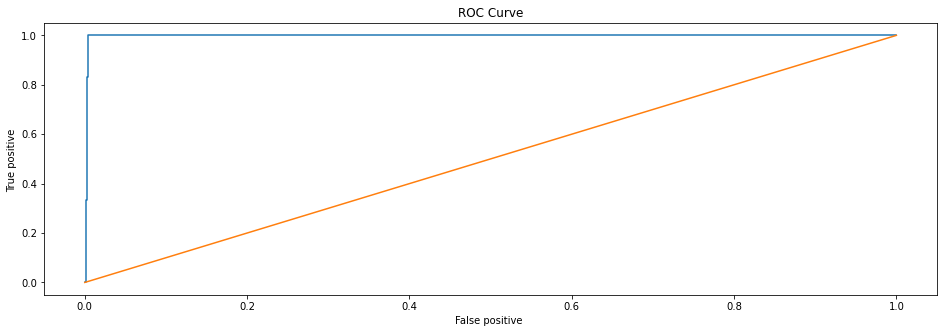

In [61]:
#ROC curve for xgboost
fpr, tpr, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])

plt.figure(figsize = (16,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],ls='-')
plt.xlabel('False positive ')
plt.ylabel('True positive ')
plt.title('ROC Curve')
print("ROC AUC score = ", roc_auc_score(y_test, xgboost.predict_proba(X_test)[:,1]))

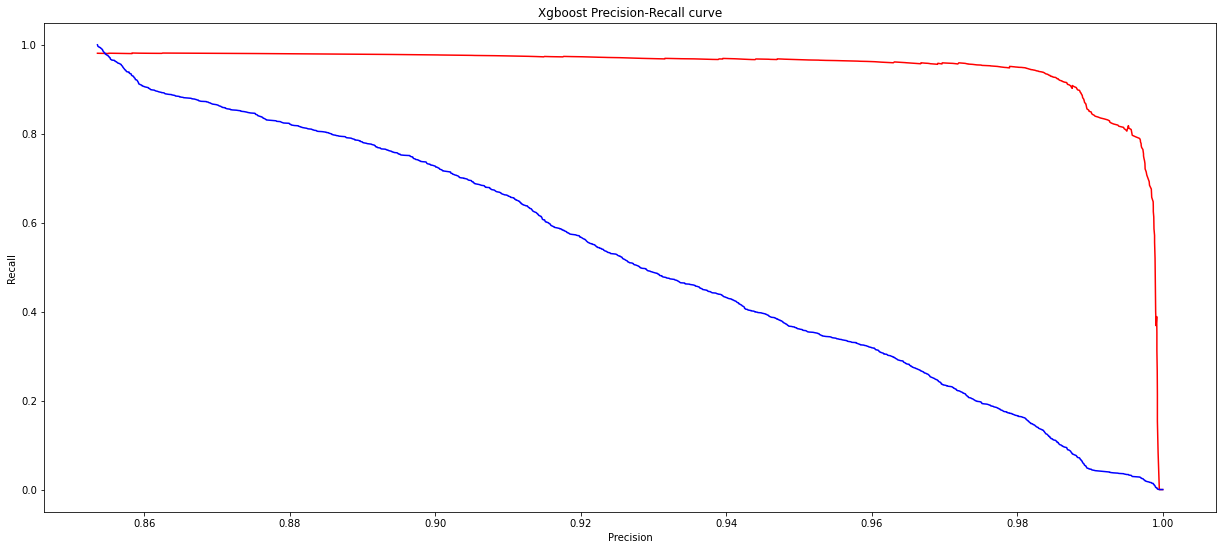

In [62]:
#Precision-Recall curve for logistic regression
y_scores = lr.predict_proba(X_smoted)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_smoted, y_scores)
plt.figure(figsize = (21, 9))
plt.plot(threshold, precision[:-1], "r-")
plt.plot(threshold, recall[:-1], "b")    
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("Xgboost Precision-Recall curve")
plt.show()

In [63]:
names=exoplanets[exoplanets["Habitable_Planets"]==1][["st_mass","pl_name","st_teff"]]
names
#Important ones Kepler 452b,Kepler 22b,Kepler 442b,Trappist1 g

,st_mass,pl_name,st_teff
147,0.12,GJ 1061 c,2953.00
148,0.12,GJ 1061 d,2953.00
162,NaN,GJ 163 c,NaN
173,0.29,GJ 273 b,3382.00
185,0.42,GJ 3293 d,3466.00
187,0.16,GJ 3323 b,3159.00
197,0.34,GJ 357 d,3505.00
222,0.33,GJ 667 C c,3350.00
223,0.33,GJ 667 C e,3350.00
224,0.33,GJ 667 C f,3350.00


In [64]:
habitable_exoplanets=exoplanets[exoplanets["Habitable_Planets"]==1]["Habitable_Planets"].count()
nonhabitable_exoplanets=exoplanets[exoplanets["Habitable_Planets"]==0]["Habitable_Planets"].count()
print(habitable_exoplanets)
print(nonhabitable_exoplanets)
ratio=habitable_exoplanets/(habitable_exoplanets+nonhabitable_exoplanets)
print(ratio)

54
4335
0.012303485987696514


In [65]:

hab_rat=newexoplanets[newexoplanets["Habitable_Planets"]==1]["st_mass"]/newexoplanets[newexoplanets["Habitable_Planets"]==1]["st_teff"]
hab_rat
nonhab_rat=newexoplanets[newexoplanets["Habitable_Planets"]==0]["st_mass"]/newexoplanets[newexoplanets["Habitable_Planets"]==0]["st_teff"]
nonhab_rat
stats.ttest_ind(hab_rat,nonhab_rat)

Ttest_indResult(statistic=-3.6729019804088607, pvalue=0.00024527860030913886)

In [66]:
hab_ecc=newexoplanets[newexoplanets["Habitable_Planets"]==1]["st_met"]/newexoplanets[newexoplanets["Habitable_Planets"]==1]["st_teff"]
hab_ecc
nonhab_ecc=newexoplanets[newexoplanets["Habitable_Planets"]==0]["st_met"]/newexoplanets[newexoplanets["Habitable_Planets"]==0]["st_teff"]
nonhab_ecc
stats.ttest_ind(hab_ecc,nonhab_ecc)

Ttest_indResult(statistic=-4.191116908310949, pvalue=2.8806652163400782e-05)

In [67]:
hab_ecc=newexoplanets[newexoplanets["Habitable_Planets"]==1]["pl_rade"]/newexoplanets[newexoplanets["Habitable_Planets"]==1]["pl_orbper"]
hab_ecc
nonhab_ecc=newexoplanets[newexoplanets["Habitable_Planets"]==0]["pl_rade"]/newexoplanets[newexoplanets["Habitable_Planets"]==0]["pl_orbper"]
nonhab_ecc
stats.ttest_ind(hab_ecc,nonhab_ecc)

Ttest_indResult(statistic=-2.4096143161626737, pvalue=0.016047409151512333)

### Questions,Hypothesis
 - Which exoplanets are habitable?
 - How much percent of the found exoplanets are habitable?
 - How similar habitable exoplanets to earth?
 - My hypothesis is: Every planet that has earth like features are habitable.

### CONCLUSION 
 In conclusion 
- We see that xgboost model  better than other models to classify habitation on exoplanets.
- We see that exoplanets that have identical features to earth is habitable
- We see that only 0.01% is determined as habitable from the all exoplanets that we have found
- We see that not one but many difeerent factor have big role to determine the habitability for an exoplanets. 
- We see that masss and Star temperrature ratio is proving that not every exoplanet that has similar features to earth is habitable
- We also see that metallicity of Start and temperature of the star is prvoing the same idea.
- We test radius and orbital period of the exoplanets to prove the idea too.
- But since there is many different factor even the tests fail sometimes.
- There is many more test and factors too but these are some of the most important ones and there is so many missing data in the dataset


### REFERENCES 
https://exoplanetarchive.ipac.caltech.edu/  <br>
https://exoplanets.nasa.gov/   <br>
http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database <br>
https://xgboost.readthedocs.io/en/latest/ <br>
https://machinelearningmastery.com/xgboost-for-imbalanced-classification/#:~:text=XGBoost%20is%20an%20effective%20machine,establish%20a%20baseline%20in%20performance <br>
https://www.space.com/17738-exoplanets.html <br>
https://en.wikipedia.org/wiki/List_of_potentially_habitable_exoplanets  <br>
https://towardsdatascience.com/how-to-add-text-labels-to-scatterplot-in-matplotlib-seaborn-ec5df6afed7a <br>
https://en.wikipedia.org/wiki/Orbital_eccentricity <br>

For more information or visualization <br>
https://exoplanets.nasa.gov/exoplanet-catalog/5471/kepler-452-b/